<a href="https://colab.research.google.com/github/AbolajiOsobamiro/pythoncodes/blob/main/Reinforcement_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gymnasium

In [54]:
from pathlib import Path
import time


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import gymnasium as gym

In [60]:
env = gym.make('FrozenLake-v1', render_mode='ansi')

In [61]:
states = env.observation_space.n
action = env.action_space.n

In [62]:
Q = np.zeros((states,action))

In [75]:
episodes = 500000
max_steps = 100

learning_rate = 0.81
gamma = 0.96
epsilon = 0.9

render = False

In [ ]:
rewards = []

for episode in range(episodes):

  state, info = env.reset()
  for _ in range(max_steps):
    if render:
      env.render()

    if np.random.uniform(0,1) < epsilon:
      action = env.action_space.sample()
    else:
      action = np.argmax(Q[state, :])

    next_state,reward, done, info, prob = env.step(action)

    Q[state,action] = Q[state,action] + learning_rate * (reward + gamma * np.max(Q[next_state, :]) - Q[state,action])
    state = next_state

    if done:
      rewards.append(reward)
      epsilon -= 0.001
      break

print(Q)
print(f"Average reward: {sum(rewards)/len(rewards)}")

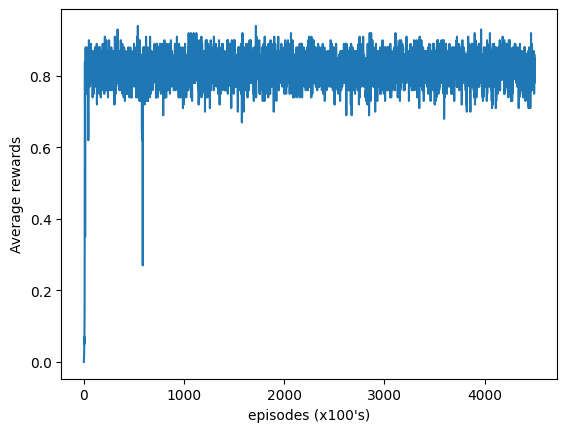

In [77]:
def get_average(values):
  return sum(values) / len(values)

avg_rewards = []
for i in range(0, len(rewards), 100):
  avg_rewards.append(get_average(rewards[i:i+100]))

plt.plot(avg_rewards)
plt.ylabel('Average rewards')
plt.xlabel("episodes (x100's)")
plt.show()